# Analysis of the barley data collected by the phenological station in Ergolding (Bayer)

In [52]:
import pandas as pd
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [53]:
cwd =os.getcwd()
p_cwd = Path(cwd).parent.absolute()
df = pd.read_csv(os.path.join(p_cwd, "data","barley_data","ergolding_data.csv"), parse_dates=['date'])

In [54]:
df

,s_id,provider_id,lon,lat,alt,alt_dem,gss_id,genus,species,subspecies,phase_id,year,day,date,cult_season,affected_flag,qc_flag,qc_ori_flag
0,3750,101,12.1833,48.5833,390,376,1660100,Hordeum,Hordeum vulgare,NaN,31,1951,95,1951-04-05,2,0,0,0
1,3750,101,12.1833,48.5833,390,376,1660100,Hordeum,Hordeum vulgare,NaN,0,1951,96,1951-04-06,1,0,0,0
2,3750,101,12.1833,48.5833,390,376,1660100,Hordeum,Hordeum vulgare,NaN,10,1951,110,1951-04-20,1,0,0,0
3,3750,101,12.1833,48.5833,390,376,1660100,Hordeum,Hordeum vulgare,NaN,31,1951,124,1951-05-04,1,0,0,0
4,3750,101,12.1833,48.5833,390,376,1660100,Hordeum,Hordeum vulgare,NaN,51,1951,137,1951-05-17,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,3750,101,12.1833,48.5833,390,376,1660100,Hordeum,Hordeum vulgare,NaN,31,1963,123,1963-05-03,1,0,0,0
528,3750,101,12.1833,48.5833,390,376,1660100,Hordeum,Hordeum vulgare,NaN,51,1963,144,1963-05-24,2,0,0,0
529,3750,101,12.1833,48.5833,390,376,1660100,Hordeum,Hordeum vulgare,NaN,51,1963,163,1963-06-12,1,0,0,0
530,3750,101,12.1833,48.5833,390,376,1660100,Hordeum,Hordeum vulgare,NaN,100,1963,194,1963-07-13,2,0,0,0


In [55]:
df['affected_flag'].unique().tolist()

[0]

In [56]:
df.drop(['s_id','provider_id','lon','lat','alt','alt_dem','gss_id','genus','species','subspecies', 'date','affected_flag','qc_flag','qc_ori_flag'], axis=1, inplace=True)

In [57]:
df

,phase_id,year,day,cult_season
0,31,1951,95,2
1,0,1951,96,1
2,10,1951,110,1
3,31,1951,124,1
4,51,1951,137,2
...,...,...,...,...
527,31,1963,123,1
528,51,1963,144,2
529,51,1963,163,1
530,100,1963,194,2


In [58]:
df

,phase_id,year,day,cult_season
0,31,1951,95,2
1,0,1951,96,1
2,10,1951,110,1
3,31,1951,124,1
4,51,1951,137,2
...,...,...,...,...
527,31,1963,123,1
528,51,1963,144,2
529,51,1963,163,1
530,100,1963,194,2


In [59]:
df_winter = df[df['cult_season']==2]

In [60]:
df_winter.drop(['cult_season'], axis=1, inplace=True)

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [61]:
df_winter.head()

,phase_id,year,day
0,31,1951,95
4,51,1951,137
6,0,1951,270
7,10,1951,279
8,31,1952,97


In [62]:
df_winter.dtypes

phase_id    int64
year        int64
day         int64
dtype: object

## Analysis of the winter data

In [63]:
df_winter

,phase_id,year,day
0,31,1951,95
4,51,1951,137
6,0,1951,270
7,10,1951,279
8,31,1952,97
...,...,...,...
522,0,1962,261
523,10,1962,268
525,31,1963,101
528,51,1963,144


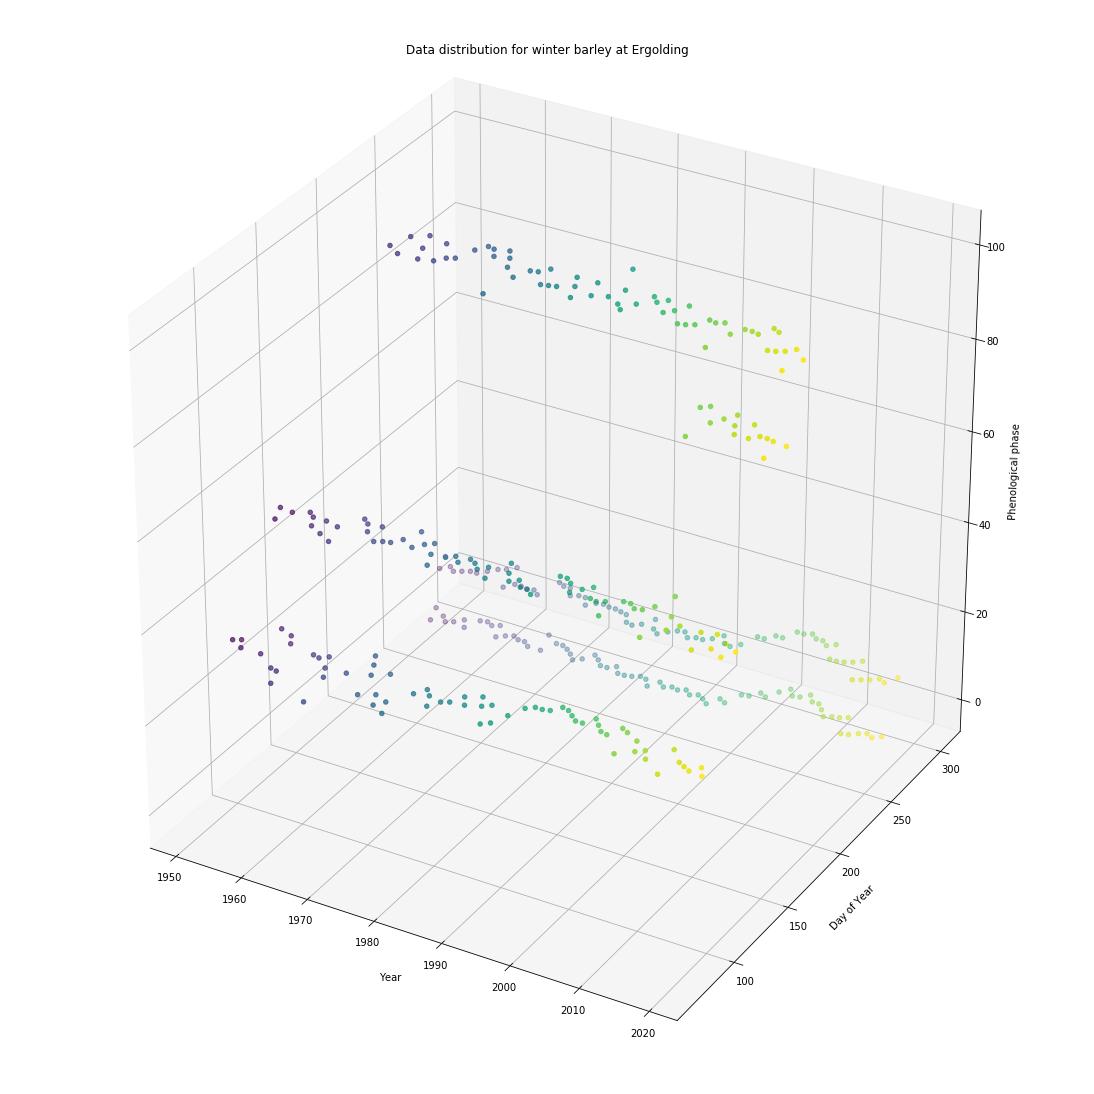

In [64]:
# 3D-Scatterplot


fig = plt.figure(figsize=(15,15))
ax=Axes3D(fig)


xs = df_winter['year']
ys = df_winter['day']
zs =df_winter['phase_id']
ax.scatter(xs, ys, zs, c=df_winter['year'])
ax.set_xlabel('Year', labelpad=10)
ax.set_ylabel('Day of Year', labelpad=10)
ax.set_zlabel('Phenological phase', labelpad=10)

plt.title("Data distribution for winter barley at Ergolding", pad=40)
plt.show()

In [65]:
fig.savefig(os.path.join(p_cwd, "output","images","ergolding_winterbarley_plot.jpg"), dpi=300,
        orientation='portrait')

In [66]:
#selecting the data points ofr the harvest phase
df_winter_harvest = df_winter[df_winter['phase_id']==100]

In [67]:
df_winter_harvest.drop(['phase_id'], axis=1, inplace=True)

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [68]:
df_winter_harvest.head()

,year,day
29,1988,192
35,1989,223
44,2003,191
49,2004,198
55,2005,197


In [69]:
df_winter_harvest.sort_values('year', inplace=True)

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
df_winter_harvest

,year,day
84,1959,189
94,1960,201
510,1961,184
520,1962,206
530,1963,194
...,...,...
185,2015,187
191,2016,189
197,2017,193
203,2018,173


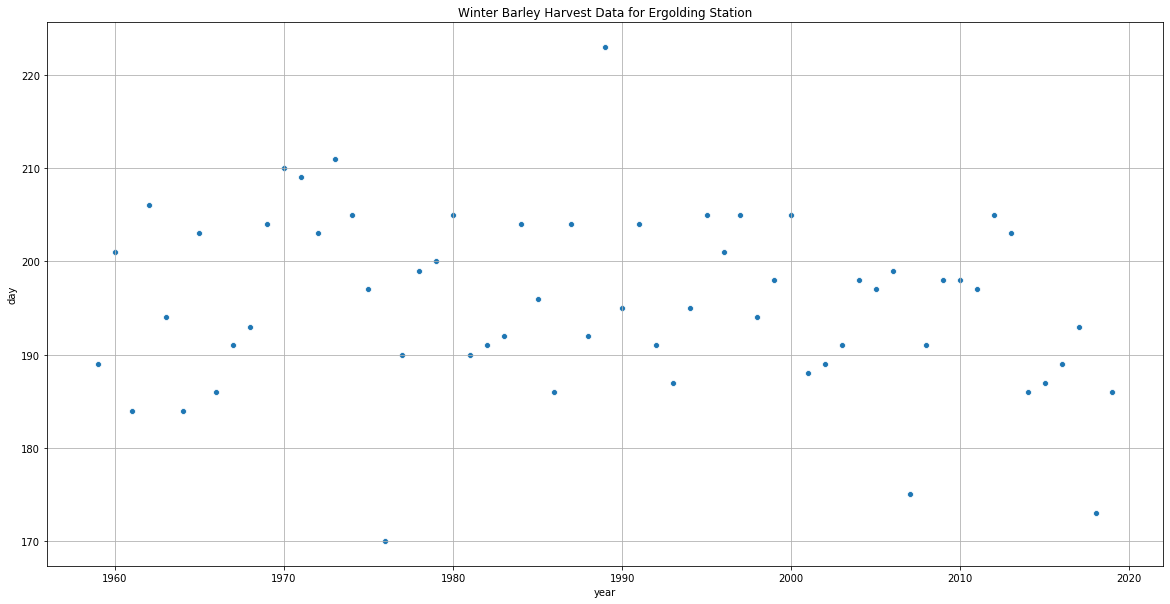

In [71]:
fig = plt.figure(figsize=(20,10))
plt.title("Winter Barley Harvest Data for Ergolding Station")
plt.grid()
sns.scatterplot(x=df_winter_harvest['year'],y=df_winter_harvest['day']);

In [72]:
X=np.array(df_winter_harvest['year']).reshape(-1,1)
X.shape

(61, 1)

In [73]:
y=np.array(df_winter_harvest['day'])
y.shape

(61,)

In [74]:
regr = LinearRegression().fit(X, y)

In [75]:
round(regr.score(X,y),3)

0.031

In [76]:
b=regr.coef_
b

array([-0.09338974])

In [77]:
a=regr.intercept_
a

381.40793231094665

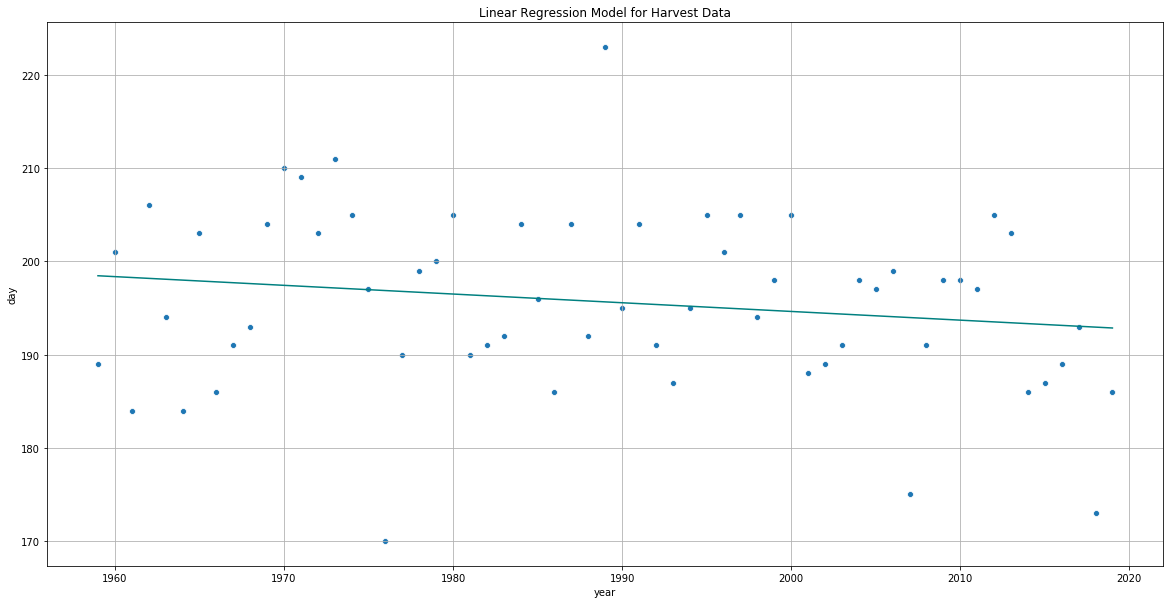

In [78]:
plt.figure(figsize=(20,10))
plt.grid()
plt.title("Linear Regression Model for Harvest Data")
sns.scatterplot(x=df_winter_harvest['year'], y=df_winter_harvest['day'])
plt.plot(X, a+b*X, linestyle='-', c='teal');

In [79]:
mu = np.mean(y)
mu

195.65573770491804

In [80]:
sample=df_winter_harvest[df_winter_harvest['year']>=2000]['day'].to_list()
sample_mean=np.mean(np.array(sample))
sample_mean

192.4

In [81]:
sample_sd = np.std(np.array(sample))
sample_sd 

8.505292469985967

In [82]:
sigma = np.std(y)
sigma

9.380630979339585

In [83]:
z_stat = (sample_mean-mu)/(sigma/np.sqrt(np.size(np.array(sample))))

In [84]:
z_stat 

-1.5521452322641953

Significant at alpha=0.1 https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistest-means-proportions/bs704_hypothesistest-means-proportions3.html

In [85]:
# With Statsmodels

import statsmodels.api as sm
X = df_winter_harvest[['year']]
X = sm.add_constant(X)
X

,const,year
84,1.0,1959
94,1.0,1960
510,1.0,1961
520,1.0,1962
530,1.0,1963
...,...,...
185,1.0,2015
191,1.0,2016
197,1.0,2017
203,1.0,2018


In [86]:
y

array([189, 201, 184, 206, 194, 184, 203, 186, 191, 193, 204, 210, 209,
       203, 211, 205, 197, 170, 190, 199, 200, 205, 190, 191, 192, 204,
       196, 186, 204, 192, 223, 195, 204, 191, 187, 195, 205, 201, 205,
       194, 198, 205, 188, 189, 191, 198, 197, 199, 175, 191, 198, 198,
       197, 205, 203, 186, 187, 189, 193, 173, 186])

In [87]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.870
Date:                Sun, 06 Jun 2021   Prob (F-statistic):              0.177
Time:                        11:50:54   Log-Likelihood:                -222.16
No. Observations:                  61   AIC:                             448.3
Df Residuals:                      59   BIC:                             452.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        381.4079    135.831      2.808      0.007     109.610     653.206
year          -0.0934      0.068     -1.368      0.177      -0.230       0.043
==============================================================================
Omnibus:                        2.722   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                2.004
Skew:                          -0.209   Prob(JB):                        0.367
Kurtosis:                       3.784   Cond. No.                     2.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
model2 = sm.GLSAR(y, X, rho=2)
res = model2.iterative_fit(maxiter=100)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:                      y   R-squared:                       0.028
Model:                          GLSAR   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.635
Date:                Sun, 06 Jun 2021   Prob (F-statistic):              0.206
Time:                        11:51:19   Log-Likelihood:                -214.66
No. Observations:                  59   AIC:                             433.3
Df Residuals:                      57   BIC:                             437.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        418.1965    174.073      2.402      0.020      69.621     766.772
year          -0.1118      0.087     -1.279      0.206      -0.287       0.063
==============================================================================
Omnibus:                        4.027   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.439
Skew:                          -0.318   Prob(JB):                        0.179
Kurtosis:                       3.998   Cond. No.                     2.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Creating a time series with the data and extracting the trend

In [89]:
len(sorted(df_winter_harvest['year'].to_list())) #complete time series from 1959 until 2019

61

In [90]:
df_winter_harvest.head()

,year,day
29,1988,192
35,1989,223
44,2003,191
49,2004,198
55,2005,197


In [91]:
df_winter_harvest=df_winter_harvest.set_index('year')

In [92]:
df_winter_harvest=df_winter_harvest.sort_index()
df_winter_harvest

,day
year,
1959,189
1960,201
1961,184
1962,206
1963,194
...,...
2015,187
2016,189
2017,193


/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


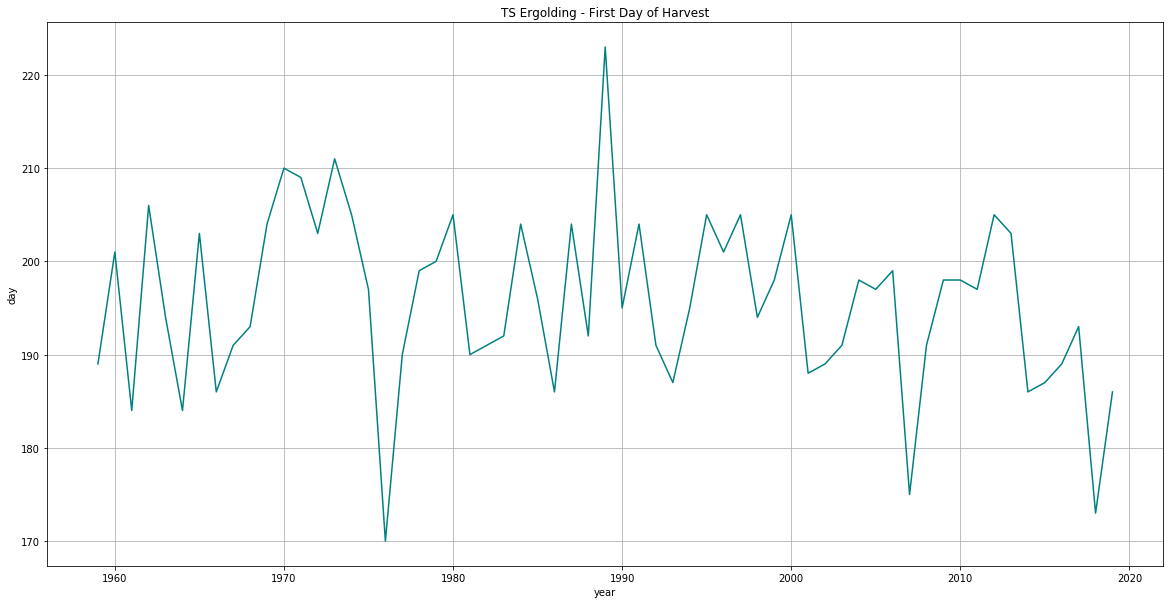

In [94]:
plt.figure(figsize=(20,10))
plt.grid()
sns.lineplot(x=df_winter_harvest.index,y=df_winter_harvest['day'], c='teal')
plt.title("TS Ergolding - First Day of Harvest");

In [95]:
df_ts=df_winter_harvest

In [96]:
df_ts['rolling']=df_ts.rolling(10).mean()

In [97]:
df_ts

,day,rolling
year,,
1959,189,NaN
1960,201,NaN
1961,184,NaN
1962,206,NaN
1963,194,NaN
...,...,...
2015,187,193.9
2016,189,192.9
2017,193,194.7


/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/gi

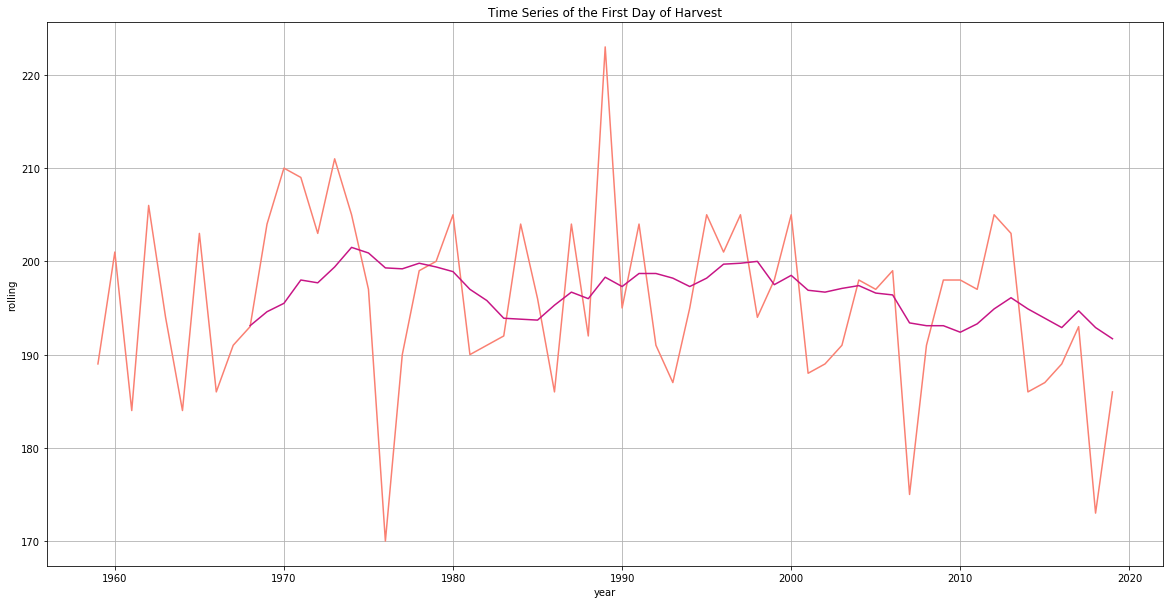

In [99]:
plt.figure(figsize=(20,10))
plt.grid()
sns.lineplot(x=df_ts.index,y=df_ts['day'], c='salmon')
sns.lineplot(x=df_ts.index,y=df_ts['rolling'], c= 'mediumvioletred')
plt.title("Time Series of the First Day of Harvest");